<a href="https://colab.research.google.com/github/Pranavendra1312/new/blob/master/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive,files
drive.mount('/content/drive/')
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
files.upload()

In [8]:
import Huffman as hf
import RSA as rsa
import Vig_qw as vig
import lsb as lsb
plain_text=input("Enter plain text : ")
print("")
print("======================== VIGENERE ENCRYPTION ==================================")
print("")
key=input("Enter vig key : ")
key=vig.generateKey(plain_text,key)
Vig_encryp_text=vig.vig_encrypt(plain_text,key)
print("Vigenere Cipher_text is: ",Vig_encryp_text)
# print(vig.vig_decrypt(Vig_encryp_text,key))
print("")
print("======================== RSA ENCRYPTION ==================================")
print("")
p = int(input(" - Enter a prime number (17, 19, 23, etc): "))
q = int(input(" - Enter another prime number (Not one you entered above): "))
public,private=rsa.generate_key_pair(p,q)
print("Public and Private keys are:",public,private)
print("")
rsa_encryp_text=rsa.encrypt(public,Vig_encryp_text)
print("RSA Cipher_text is : ",rsa_encryp_text)

print("")
# print(rsa.decrypt(private,rsa_encryp_text))
b='*'.join([str(elem) for elem in rsa_encryp_text])
print(b)
print("")
print("======================== HUFFMAN ENCODING ==================================")
print("")
hf_enc,hf_tree=hf.HuffmanEncoding(b)
print("Cipher text after huffman encoding is :")
print(hf_enc)


Enter plain text : hello_world

======================== VIGENERE ENCRYPTION ==================================

Enter vig key : macha
Vigenere Cipher_text is:  Q_93[B)/[?7

======================== RSA ENCRYPTION ==================================

 - Enter a prime number (17, 19, 23, etc): 17
 - Enter another prime number (Not one you entered above): 19
Public and Private keys are: (167, 323) (407, 323)

RSA Cipher_text is :  [123, 209, 133, 204, 116, 263, 148, 225, 116, 24, 234]

123*209*133*204*116*263*148*225*116*24*234

======================== HUFFMAN ENCODING ==================================

symbols:  dict_keys(['1', '2', '3', '*', '0', '9', '4', '6', '8', '5'])
probabilities:  dict_values([7, 8, 5, 10, 2, 1, 4, 3, 1, 1])
symbols with codes {'4': '0000', '0': '00010', '5': '00011', '1': '001', '6': '0100', '8': '01010', '9': '01011', '3': '011', '*': '10', '2': '11'}
Space usage before compression (in bits): 336
Space usage after compression (in bits): 125
Cipher text after 

input image


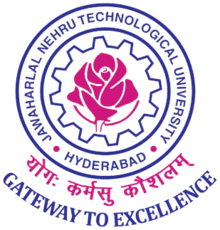

[*] Maximum bytes to encode: 18975
[*] Encoding data...


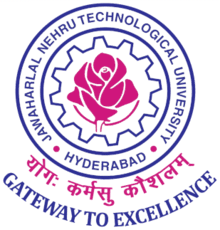

[+] Decoding...
[+] Stegano Decoded data: 31112111211413121114121121112114161413121312112141114161212121111411141312131211512112115


In [18]:
import cv2
import fxn as fxn

secret_text=fxn.func_compress(hf_enc)
if __name__ == "__main__":
    input_image = "/content/jntu.png"
    print("input image")
    output_image = "/content/encoded_image.png"
    secret=secret_text
    
    # encode the data into the image
    encoded_image = lsb.encode(image_name=input_image, secret_data=secret)
    # save the output image (encoded image)
    cv2.imwrite(output_image, encoded_image)
    # decode the secret data from the image
    decoded_data = lsb.decode(output_image)
    print("[+] Stegano Decoded data:", decoded_data)

      

In [19]:
secret=fxn.func_restore(decoded_data)
x=hf.HuffmanDecoding(secret,hf_tree)
print(x)
p=x.split('*')
p=[int(elem) for elem in p]
rsa_decryp_text=rsa.decrypt(private,rsa_encryp_text)
print(rsa_decryp_text)
vig_decryp_text=vig.vig_decrypt(rsa_decryp_text,key)
print(vig_decryp_text)


123*209*133*204*116*263*148*225*116*24*234
Q_93[B)/[?7
hello_world
